## Setup

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# data_file = input("Please enter the name of the data file: ")
# if data_file.endswith(".csv") != True:
# 	data_file += ".csv"

# the subset of our dataset where there is an analysis of elements and minerals
data_file = "data-files/AAPG-Training-Dataset.csv"

# load our training data
data = np.loadtxt(data_file, delimiter=",", skiprows=1)

# slice the data into elements (input_data, first 9 columns) and minerals (output_data, all columns after the 9th)
input_data = data[:,0:9]
output_data = data[:,9:]

Using TensorFlow backend.


## Build a Model

In [2]:
# Sequential() is a base model accessible through keras
# https://keras.io/api/models/sequential/
model = Sequential()

# decide how many activation layers to run through
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(9, input_dim=9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9))

# decide on an optimizer
# https://keras.io/api/optimizers/
optimizer = keras.optimizers.RMSprop(0.001)

# compile the model for training, with a defined function (metrics) to determine how 'good' the model is
# https://keras.io/api/metrics/
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

## Train a Model

In [3]:
# train the model
# epochs specifies how many times the training is conducted, and this number is subjective to dataset
model.fit(input_data, output_data, epochs=250, batch_size=10)

_, accuracy = model.evaluate(input_data, output_data)

print("The mean squared error accuracy is", accuracy)



Epoch 1/250
125/125 [==============================] - 0s 2ms/step - loss: 377.3447 - mean_squared_error: 377.3447
Epoch 2/250
125/125 [==============================] - 0s 130us/step - loss: 356.1902 - mean_squared_error: 356.1902
Epoch 3/250
125/125 [==============================] - 0s 127us/step - loss: 340.5413 - mean_squared_error: 340.5413
Epoch 4/250
125/125 [==============================] - 0s 132us/step - loss: 325.6730 - mean_squared_error: 325.6730
Epoch 5/250
125/125 [==============================] - 0s 129us/step - loss: 310.9110 - mean_squared_error: 310.9110
Epoch 6/250
125/125 [==============================] - 0s 123us/step - loss: 295.3727 - mean_squared_error: 295.3727
Epoch 7/250
125/125 [==============================] - 0s 127us/step - loss: 279.0143 - mean_squared_error: 279.0143
Epoch 8/250
125/125 [==============================] - 0s 115us/step - loss: 261.8127 - mean_squared_error: 261.8127
Epoch 9/250
125/125 [==============================] - 0s 116us/

## Observe Results and Save Model

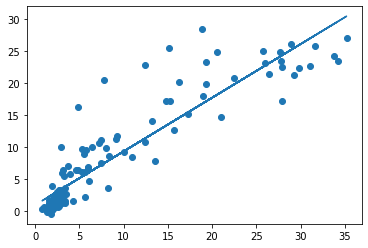

In [4]:
predicted_data = model.predict(input_data)
m, b = np.polyfit(output_data[:,0], predicted_data[:,0], 1)
plt.scatter(output_data[:,0], predicted_data[:,0])
plt.plot(output_data[:,0], m*output_data[:,0] + b)

model.save("models/aapg-model.h5")